In [2]:
import os

import glob
import re #from re import A, I

import pyabf

import numpy as np
import pylab as pl
import pandas as pd

import seaborn as sns

natsort = lambda s: [int(t) if t.isdigit() else t.lower() for t in re.split('(\d+)', s)]


In [3]:
video_src = '/mnt/sda/Videos/sound-chamber'
audio_src = os.path.join(video_src, 'abf-files')


#### Check audio files

/mnt/sda/Videos/sound-chamber/abf-files/20220220-1055_yak_4do_gh.abf
/mnt/sda/Videos/sound-chamber/abf-files/20220220-1130_yak_4do_gh.abf
/mnt/sda/Videos/sound-chamber/abf-files/20220220-1213_ctns_4do_gh.abf
/mnt/sda/Videos/sound-chamber/abf-files/20220220-1244_ctns_8do_gh.abf


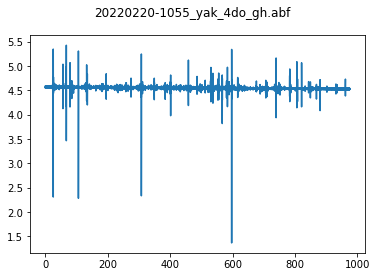

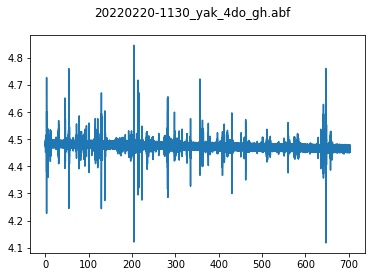

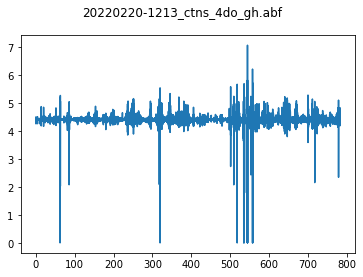

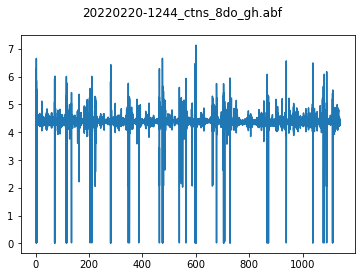

In [4]:
session = '20220220'

audio_fpaths = sorted(glob.glob(os.path.join(audio_src, '%s-*.abf' % session)), key=natsort)
for abf_fpath in audio_fpaths:
    print(abf_fpath)
    abf = pyabf.ABF(abf_fpath)
#     print(abf.sweepY) # displays sweep data (ADC)
#     print(abf.sweepX) # displays sweep times (seconds)
#     print(abf.sweepC) # displays command waveform (DAC)

    fig, ax = pl.subplots()
    pl.plot(abf.sweepX, abf.sweepY)
    _, fname = os.path.split(abf_fpath)
    fig.suptitle(fname)
    ax.patch.set_alpha(0)

#### Select audio

In [5]:
audio_acquisition = '20220220-1055_yak_4do_gh'

acq_index = [i for i, v in enumerate(audio_fpaths) if audio_acquisition in v][0]

abf_fpath = os.path.join(audio_src, '%s.abf' % audio_acquisition)
abf = pyabf.ABF(abf_fpath)

audio_df = pd.DataFrame({'audio_sec': abf.sweepX,
              'audio_channel1': abf.sweepY})
audio_df.shape

(9755648, 2)

In [6]:
acq_index

0

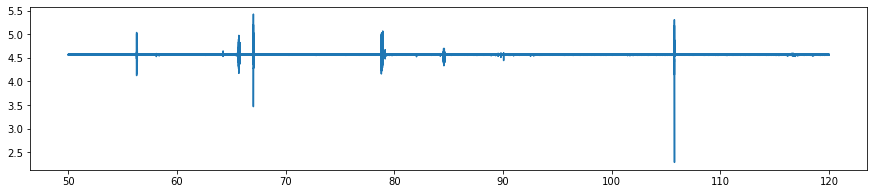

In [7]:
tmin=50
tmax=120
curr_audio = audio_df[(audio_df['audio_sec']>=tmin) & (audio_df['audio_sec']<=tmax)]

# fig, ax = pl.subplots()
# ax.plot(curr_audio['audio_sec'], curr_audio['audio_channel1'])

fig, ax = pl.subplots(figsize=(15,3))
ax.plot(curr_audio['audio_sec'], curr_audio['audio_channel1'])
#ax.set_ylim([4.45, 4.5])


#### Select video

In [8]:
video_fpaths = sorted(glob.glob(os.path.join(video_src, '%s*' % session, 'frames')), key=natsort)

video_fpaths

['/mnt/sda/Videos/sound-chamber/20220220-1038_yak_4do_gh/frames',
 '/mnt/sda/Videos/sound-chamber/20220220-1118_yak_4do_gh/frames',
 '/mnt/sda/Videos/sound-chamber/20220220-1200_ctns_4do_gh/frames',
 '/mnt/sda/Videos/sound-chamber/20220220-1225_ctns_8do_gh/frames']

In [9]:
assert len(video_fpaths)==len(audio_fpaths), 'Mismatch in N audio/video files: vid=%i, aud=%i' % (len(video_fpaths), len(audio_fpaths))
vid_fpath = video_fpaths[acq_index]
acquisition = os.path.split(os.path.split(vid_fpath)[0])[-1]
print(acquisition)
#acquisition='20220220-1200_ctns_4do_gh'

acquisition_dir = os.path.join(video_src, acquisition)
framedir = os.path.join(acquisition_dir, 'frames')
frame_fpaths = sorted(glob.glob(os.path.join(framedir, '*.png')), key=natsort)
if len(frame_fpaths)==0:
    framedir = os.path.join(acquisition_dir, 'frames-tmp')
    frame_fpaths = sorted(glob.glob(os.path.join(framedir, '*.png')), key=natsort)

print("%s: %i frames" % (acquisition, len(frame_fpaths)))

20220220-1038_yak_4do_gh
20220220-1038_yak_4do_gh: 37125 frames


In [10]:
#%%
performance_info = os.path.join(acquisition_dir, 'performance.txt')
metadata = pd.read_csv(performance_info, sep="\t")
fps = float(metadata['frame_rate'])

metadata

,frame_rate,frame_period,acq_duration,frame_count,expected_frame_count,missingFrames
0,40.0,0.025,966.5861,37125,38663,1538


In [11]:
frame_info_path = os.path.join(acquisition_dir, 'frame_times.txt')
frame_info = pd.read_csv(frame_info_path, sep="\t")
frame_info.head()

,frame,frame_ID,frame_tstamp,acq_trigger,frame_trigger,relative_time,relative_camera_time
0,0,1,80212748683032,True,True,0.034482,0.000000
1,1,2,80212773683358,True,True,0.069200,0.025000
2,2,3,80212798683657,True,True,0.103755,0.050001
3,3,4,80212823683956,True,True,0.139828,0.075001
4,4,5,80212848684282,True,True,0.179270,0.100001


In [12]:
frame_fpaths[-10:]

['/mnt/sda/Videos/sound-chamber/20220220-1038_yak_4do_gh/frames-tmp/037115.png',
 '/mnt/sda/Videos/sound-chamber/20220220-1038_yak_4do_gh/frames-tmp/037116.png',
 '/mnt/sda/Videos/sound-chamber/20220220-1038_yak_4do_gh/frames-tmp/037117.png',
 '/mnt/sda/Videos/sound-chamber/20220220-1038_yak_4do_gh/frames-tmp/037118.png',
 '/mnt/sda/Videos/sound-chamber/20220220-1038_yak_4do_gh/frames-tmp/037119.png',
 '/mnt/sda/Videos/sound-chamber/20220220-1038_yak_4do_gh/frames-tmp/037120.png',
 '/mnt/sda/Videos/sound-chamber/20220220-1038_yak_4do_gh/frames-tmp/037121.png',
 '/mnt/sda/Videos/sound-chamber/20220220-1038_yak_4do_gh/frames-tmp/037122.png',
 '/mnt/sda/Videos/sound-chamber/20220220-1038_yak_4do_gh/frames-tmp/037123.png',
 '/mnt/sda/Videos/sound-chamber/20220220-1038_yak_4do_gh/frames-tmp/037124.png']

In [13]:
frame_info.tail()

,frame,frame_ID,frame_tstamp,acq_trigger,frame_trigger,relative_time,relative_camera_time
37120,37120,38658,81179185494843,True,True,1237.462648,966.436812
37121,37121,38659,81179210495142,True,True,1237.494178,966.461812
37122,37122,38660,81179235495441,True,True,1237.525708,966.486812
37123,37123,38661,81179260495767,True,True,1237.557196,966.511813
37124,37124,38662,81179285496066,True,True,1237.588628,966.536813


In [14]:
# outfile = os.path.join(acquisition_dir, '%s.mp4' % acquisition)
# print(outfile)
# cmd='ffmpeg -y -i ' + framedir+'/%06d.png -vcodec libx264 -f mp4 -pix_fmt yuv420p ' + outfile
# print(cmd)

In [15]:
# os.system(cmd)

In [16]:
import cv2

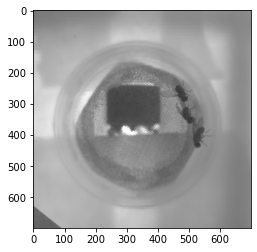

In [17]:
fp = frame_fpaths[0]
im = cv2.imread(fp) 
pl.figure()
pl.imshow(im)


In [18]:
frame_df = pd.DataFrame({'frame_ix': frame_info['frame_ID']-1,
                         'frame_name': frame_info['frame'],
                         'frame_sec': frame_info['relative_camera_time']})


In [19]:
import matplotlib.gridspec as gridspec

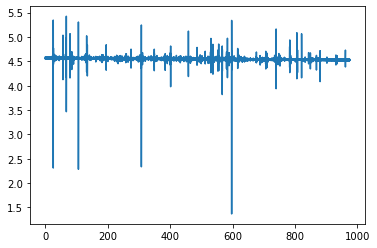

In [20]:
fig, ax = pl.subplots()

ax.plot(audio_df['audio_sec'], audio_df['audio_channel1'])

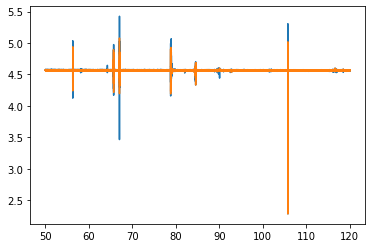

In [21]:
curr_audio = audio_df[(audio_df['audio_sec']>=tmin) & (audio_df['audio_sec']<=tmax)]

fig, ax = pl.subplots()
ax.plot(curr_audio['audio_sec'], curr_audio['audio_channel1'])
ax.plot(curr_audio['audio_sec'].iloc[0::10], curr_audio['audio_channel1'].iloc[0::10])


## Interpolate video frames

In [22]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [23]:
curr_video = frame_df[(frame_df['frame_sec']>=tmin) & (frame_df['frame_sec']<=tmax)]
curr_video

,frame_ix,frame_name,frame_sec
1924,2000,1924,50.000611
1925,2001,1925,50.025611
1926,2002,1926,50.050612
1927,2003,1927,50.075612
1928,2004,1928,50.100612
...,...,...,...
4615,4790,4615,119.751464
4616,4792,4616,119.801464
4617,4793,4617,119.826465
4618,4795,4618,119.876465


In [24]:
frame_interp = np.interp(curr_audio['audio_sec'], curr_video['frame_sec'], curr_video['frame_name'])
frame_names = curr_video['frame_name'].values

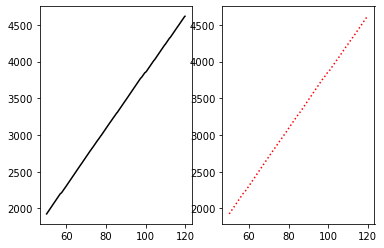

In [25]:
fig, axn = pl.subplots(1,2)
axn[0].plot(curr_video['frame_sec'].values, curr_video['frame_name'], color='k')
ax=axn[1]
ax.plot(curr_audio['audio_sec'].values, frame_interp, color='r', linestyle=':')

In [26]:
curr_audio['frame_name'] = [find_nearest(frame_names, i) for i in frame_interp]
curr_audio

<ipython-input-26-dd67e5c1a07e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_audio['frame_name'] = [find_nearest(frame_names, i) for i in frame_interp]


,audio_sec,audio_channel1,frame_name
500000,50.0000,4.569397,1924
500001,50.0001,4.570923,1924
500002,50.0002,4.570007,1924
500003,50.0003,4.569092,1924
500004,50.0004,4.570007,1924
...,...,...,...
1199996,119.9996,4.562683,4619
1199997,119.9997,4.562378,4619
1199998,119.9998,4.559631,4619
1199999,119.9999,4.559326,4619


In [27]:
frame_lut = dict((v, i) for i, v in enumerate(curr_video['frame_name']))

In [28]:
curr_audio['frame_index'] = [frame_lut[i] for i in curr_audio['frame_name']]

<ipython-input-28-a6bb87982c13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_audio['frame_index'] = [frame_lut[i] for i in curr_audio['frame_name']]


In [29]:
curr_audio

,audio_sec,audio_channel1,frame_name,frame_index
500000,50.0000,4.569397,1924,0
500001,50.0001,4.570923,1924,0
500002,50.0002,4.570007,1924,0
500003,50.0003,4.569092,1924,0
500004,50.0004,4.570007,1924,0
...,...,...,...,...
1199996,119.9996,4.562683,4619,2695
1199997,119.9997,4.562378,4619,2695
1199998,119.9998,4.559631,4619,2695
1199999,119.9999,4.559326,4619,2695


In [2]:
len(frames)

NameError: name 'frames' is not defined

In [32]:
frames = []
for fn in curr_video['frame_name'].values:
    fp = os.path.join(framedir, '%06d.png' % fn)
    im = cv2.imread(fp) 
    frames.append(im)
    

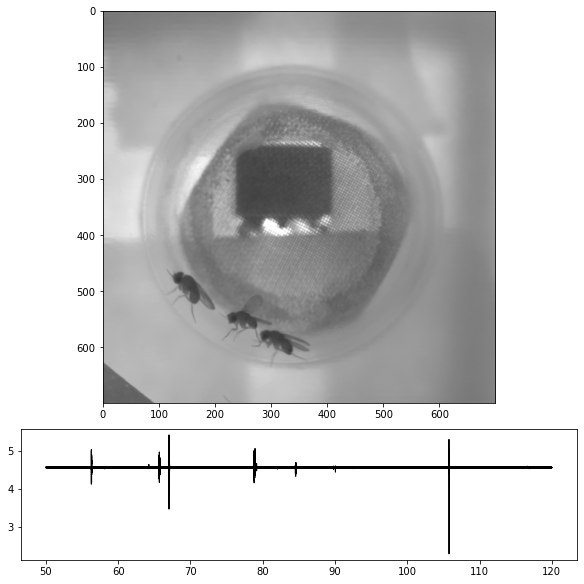

In [33]:
fig = pl.figure(figsize=(8,8), constrained_layout=True)

spec = gridspec.GridSpec(ncols=1, nrows=4, figure=fig)
ax0 = fig.add_subplot(spec[0:3, 0]) # video
ax1 = fig.add_subplot(spec[3, 0])  # wing extensions

im = ax0.imshow(frames[0], aspect='equal', cmap='gray')
p1, = ax1.plot(curr_audio['audio_sec'], curr_audio['audio_channel1'], color='k', lw=1)


In [34]:
curr_audio

,audio_sec,audio_channel1,frame_name,frame_index
500000,50.0000,4.569397,1924,0
500001,50.0001,4.570923,1924,0
500002,50.0002,4.570007,1924,0
500003,50.0003,4.569092,1924,0
500004,50.0004,4.570007,1924,0
...,...,...,...,...
1199996,119.9996,4.562683,4619,2695
1199997,119.9997,4.562378,4619,2695
1199998,119.9998,4.559631,4619,2695
1199999,119.9999,4.559326,4619,2695


In [35]:
curr_video

,frame_ix,frame_name,frame_sec
1924,2000,1924,50.000611
1925,2001,1925,50.025611
1926,2002,1926,50.050612
1927,2003,1927,50.075612
1928,2004,1928,50.100612
...,...,...,...
4615,4790,4615,119.751464
4616,4792,4616,119.801464
4617,4793,4617,119.826465
4618,4795,4618,119.876465


In [36]:
curr_audio.shape

(700001, 4)

In [37]:
video_src

'/mnt/sda/Videos/sound-chamber'

In [38]:
from matplotlib import animation, rc
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [39]:
dst_dir = os.path.join(video_src, 'examples')
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)

In [40]:
acquisition

'20220220-1038_yak_4do_gh'

In [1]:
# Set playblack
nframes = 10000*2 #len(frames) #start_frame
video_rate=20.
# interval = (1./video_rate) * 1E3
interval=1000 / video_rate

nx, ny, _ = frames[0].shape

audio_sec = curr_audio['audio_sec'].values
audio_y = curr_audio['audio_channel1'].values
audio_frame = curr_audio['frame_index'].values

fig = pl.figure(figsize=(8,8), constrained_layout=True, dpi=300)
spec = gridspec.GridSpec(ncols=1, nrows=4, figure=fig)
ax0 = fig.add_subplot(spec[0:3, 0]) # video
ax1 = fig.add_subplot(spec[3, 0])  # wing extensions

#im = ax0.imshow(frames[0], aspect='equal', cmap='gray')
p1, = ax1.plot(audio_sec, audio_y, color='k', lw=1)

window_size = 10000*1 #60.0

# def animate_with_movie(nframes, movie, x, p1_vals, p2_vals, video_rate, cdict):
# initialization function: plot the background of each frame
def init():
    #im.set_data(np.zeros((nx, ny)))
    p1.set_data([], [])
    #p2.set_data([], [])
    return (im, p1,) # p2,)

# animation function. This is called sequentially
def update(i): #, im, movie, tsec, p1, p2, p1_vals, p2_vals):
#def animate(i):
    #im.set_data(frames[audio_frame[i]])
    p1.set_data(audio_sec[:i], audio_y[:i])
    #p2.set_data(tsec[:i], wingR[:i])
    if i>window_size:
        lim = ax1.set_xlim(i-window_size, i)
    else:
        lim = ax1.set_xlim(0, window_size)
    
    return (im, p1)

# call the animator. blit=True means only re-draw the parts that have changed.
#fargs = [im, movie, tsec, p1, p2, wingL, wingR]
anim = animation.FuncAnimation(fig, update, nframes, init_func=init, ##fargs=fargs, init_func=init, 
                        interval=interval, blit=True)

# anim = animate_with_movie(nframes, movie, tsec, wingL, wingR, video_rate, cdict)
outf = os.path.join(dst_dir, 'example-bout_%s.gif' % (acquisition))
#writervideo = animation.FFMpegWriter(fps=video_rate) 
writervideo = animation.PillowWriter(fps=video_rate) 
anim.save(outf, writer=writervideo)

print(outf)
anim

NameError: name 'frames' is not defined

In [1]:
len(frames)

NameError: name 'frames' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [ ]:
def make_movie(n, duration=5, framerate=30, size=5, as_html5=False):

    # Initialize the figure
    f, ax = plt.subplots(figsize=(size, size))
    f.subplots_adjust(0, 0, 1, 1)
    lim = duration * 5
    ax.set(xlim=(-lim, lim), ylim=(-lim, lim))
    ax.set_axis_off()

    # Initialize the scatter plot
    x, y = np.zeros((2, n))
    points, = ax.plot(x, y, marker=",", linestyle="", color=".2", alpha=1)

    # Tell the blitting algorithm what artists need updating
    def init_movie():
        return points,

    # Define the action that happens on each frame
    def animate_movie(i):
        if i:  # Show initial state
            noise = np.random.normal(0, .5, size=(2, n))
            points.set_xdata(points.get_xdata() + noise[0])
            points.set_ydata(points.get_ydata() + noise[1])
        return points,

    # Produce the animation
    anim = animation.FuncAnimation(
        fig=f,
        frames=duration * framerate,
        interval=1000 / framerate,
        blit=True,
        func=animate_movie,
        init_func=init_movie,
    )

    plt.close(f)

    if as_html5:
        return HTML(anim.to_html5_video())
    return anim